# Understanding and Predicting Insurance Cost

### Objective:

- To create a model that predicts the cost of an individual's insurance.

### The Problem:

One of the most common problems for insurance company is to calculate actual premium for every individual since the profile of every person is different from each other so it takes a lot of calculation to accurately decide the premium.

# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check Null Values

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [8]:
df["sex"] = df["sex"].map({"female":0, "male":1})
df["smoker"] = df["smoker"].map({"no":0, "yes":1})

In [9]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Exploratory Data Analysis

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


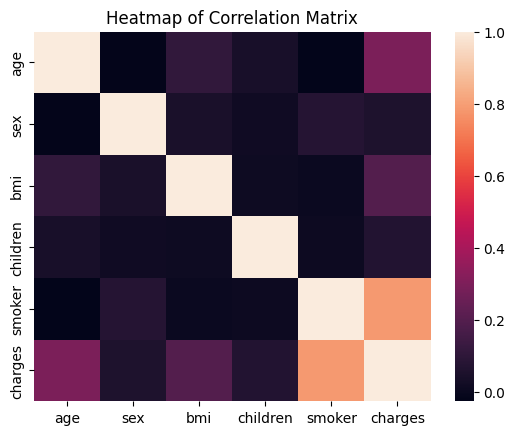

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

The correlation matrix illustrates that the charges and person being a smoker is highly positively correlated meaning higher the insurance premium for those customers who smoke.

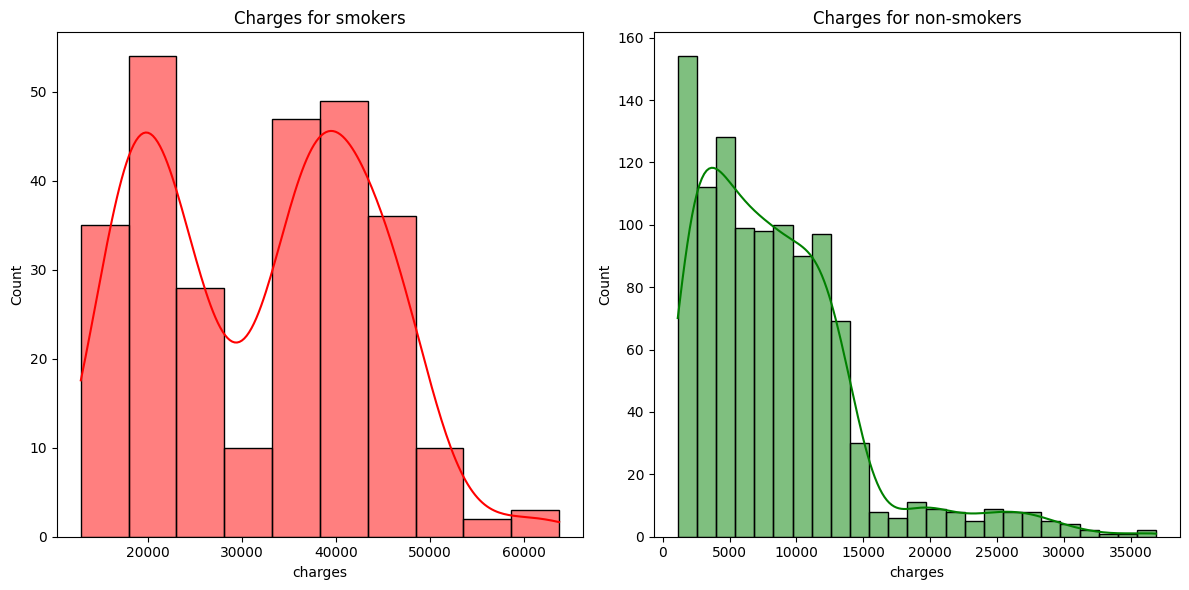

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df.smoker == 1]["charges"], color="r", kde=True)
plt.title("Charges for smokers")

plt.subplot(1, 2, 2)
sns.histplot(df[df.smoker == 0]["charges"], color="g", kde=True)
plt.title("Charges for non-smokers")

plt.tight_layout()
plt.show()

The above plot clearly gives more insights of the hypothesis that we made above in the correlation chart that the charges are higher for people who smoke compared to those who don't.

Let's count the smoker and non-smoker in both gender.

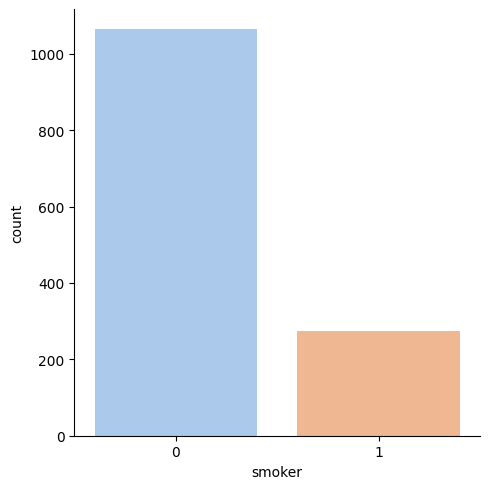

In [12]:
sns.catplot(x="smoker", kind="count", palette="pastel", data=df);

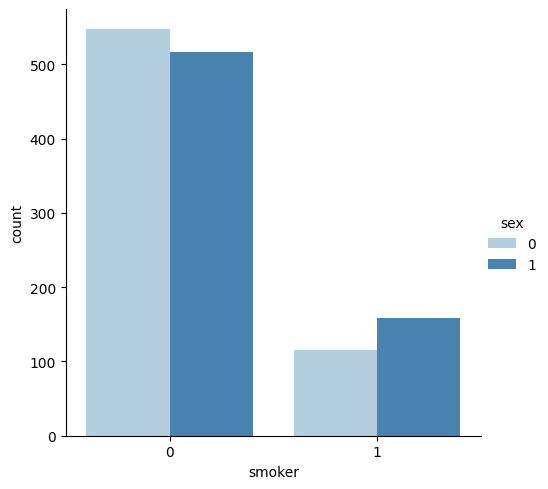

In [13]:
sns.catplot(x='smoker', kind='count', hue='sex', palette='Blues', data=df);

Here, 0 maps to female and 1 maps to male. Also, 0 relates to non-smoker and 1 relates to smoker. The above chart demonstrates that the number of male customers who smoke are higher than their female counterparts. Contrary to that, in non-smoker category, female customers are higher than the male ones.

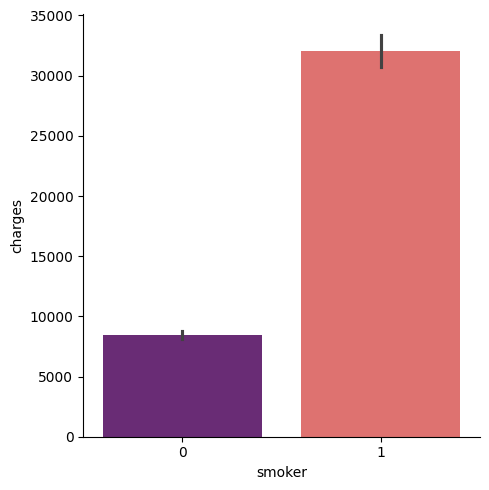

In [14]:
sns.catplot(
    data=df,        # Filter data for both gender
    x="smoker",     # x-axis representing smoker
    y="charges",    # y-axis representing charges
    kind="bar",     # bar plot
    palette="magma" # Color palette
);

The above bar chart shows that the charges for smoker is very high as compared to non-smoker so it clearly becomes one factor that will drive the premium value. The above plot is for both gender but now let's check for individual gender.

## Charges for smoker vs non-smoker for male customers

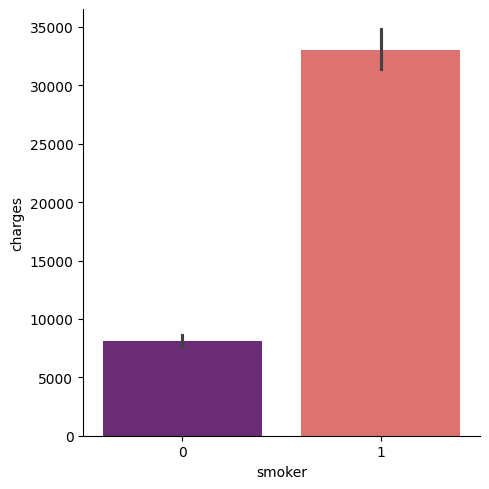

In [15]:
sns.catplot(
    data=df[df["sex"]==1],        # Filter data for 'sex' == 1
    x=df["smoker"],               # x-axis representing smoker
    y="charges",                  # y-axis representing charges
    kind="bar",                   # bar plot
    palette="magma"               # Color palette
);

## Charges for smoker vs non-smoker for female customers

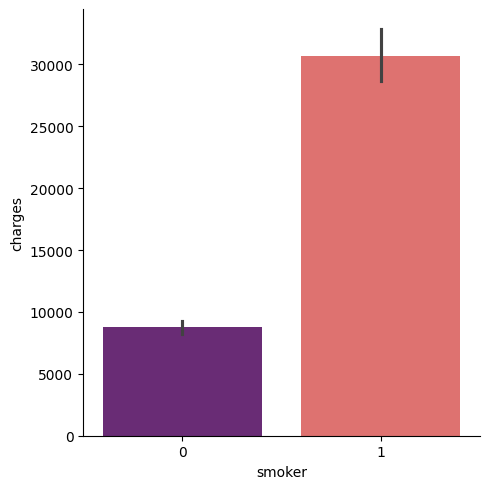

In [16]:
sns.catplot(
    data=df[df["sex"]==0],        # Filter data for 'sex' == 0
    x=df["smoker"],               # x-axis representing smoker
    y="charges",                  # y-axis representing charges
    kind="bar",                   # bar plot
    palette="magma"               # Color palette
);

All above charts conclude that the charges for customers being smokers are significantly greater than non-smokers.

Now, the second correlated factor is age so let's investigate hou much it affects the charges.

## Age vs Charges

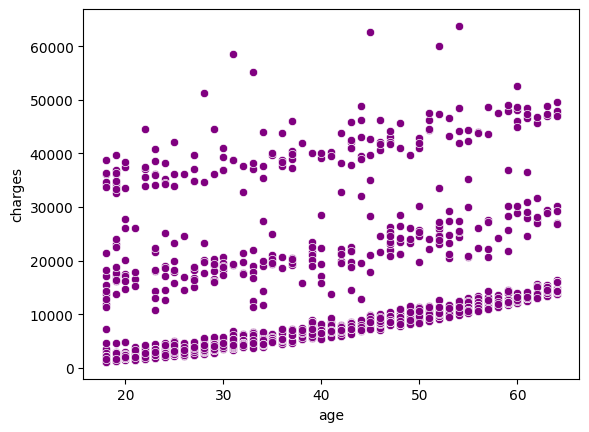

In [17]:
sns.scatterplot(x=df['age'], y=df['charges'], color='purple', data=df);

It demonstrates that as age increases, the charges also go up. Now, let's check how the smoker factor affects with age.

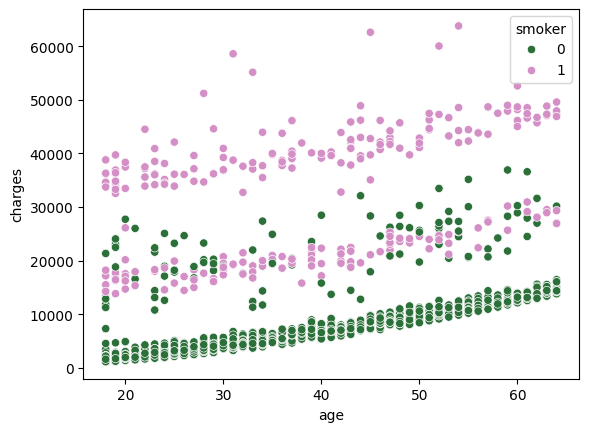

In [18]:
sns.scatterplot(x=df['age'], y=df['charges'], palette='cubehelix', hue='smoker', data=df);

This chart clearly shows the influence of being a smoker can deamatically increase the charges even if the age is very low. Apart from that, age has somewhat linear relationship with the charges.

## 3. BMI vs Charges

Now let's investigate how the charges get affected when BMI goes up.

In [19]:
min = df.bmi.min()
max = df.bmi.max()
print(f"Lowest BMI value in the dataset: {min}")
print(f"Highest BMI value in the dataset: {max}")

Lowest BMI value in the dataset: 15.96
Highest BMI value in the dataset: 53.13


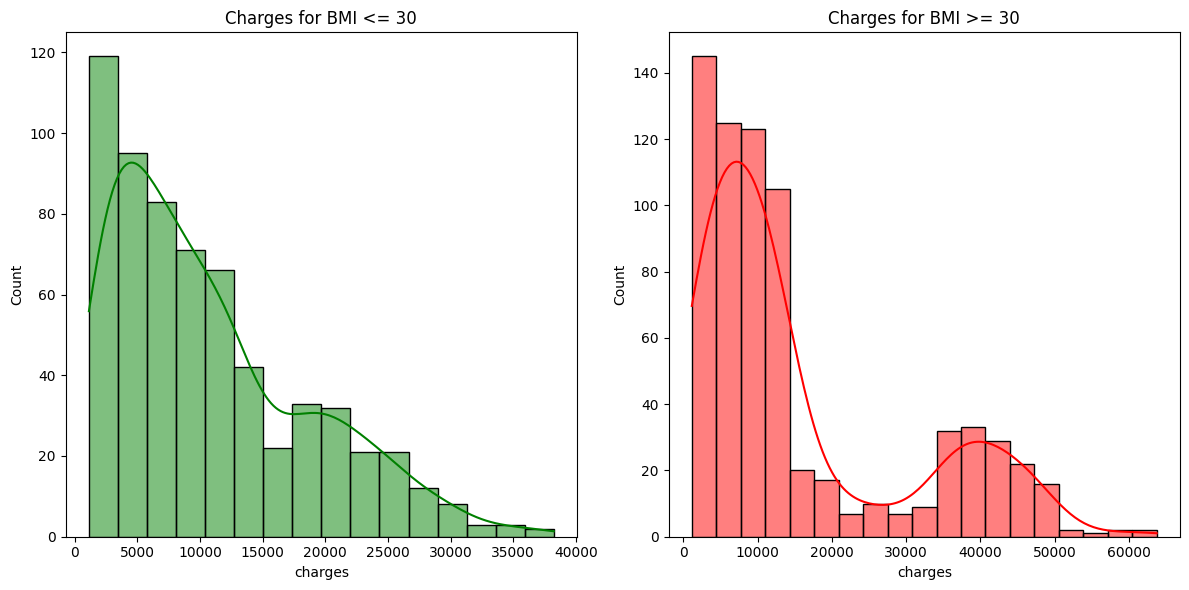

In [20]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df[df.bmi<=30]["charges"], color="g", kde=True)
plt.title("Charges for BMI <= 30")

plt.subplot(1, 2, 2)
sns.histplot(df[df.bmi>=30]["charges"], color="r", kde=True)
plt.title("Charges for BMI >= 30")

plt.tight_layout()
plt.show();

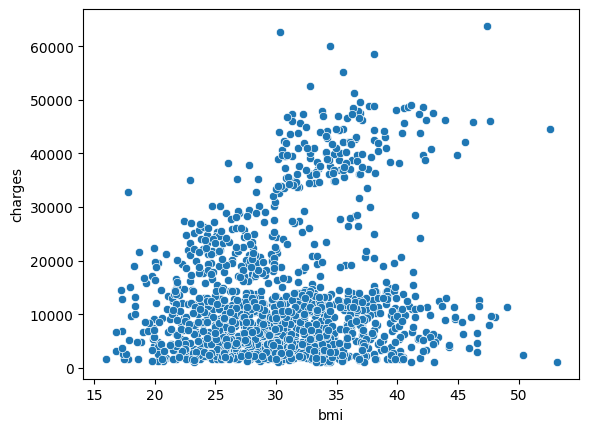

In [21]:
sns.scatterplot(x=df['bmi'], y=df['charges'], palette='cubehelix', data=df);

This chart gives clear idea that the lower the BMI, lower the charges. But since it's not the most influencial factor so it single-handedly does not drive the charges up or down.

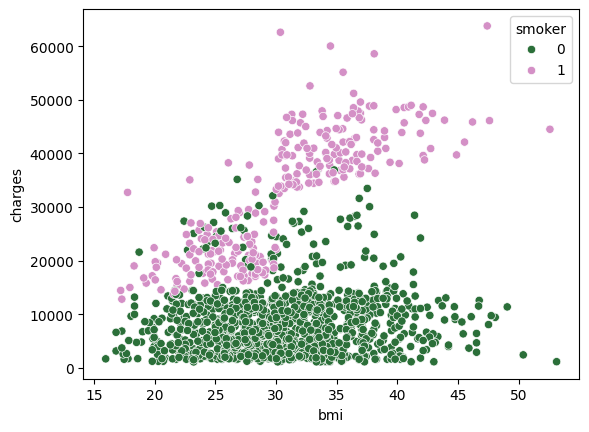

In [22]:
sns.scatterplot(x=df['bmi'], y=df['charges'], palette='cubehelix', hue='smoker', data=df);

When the smoker factor is added to the above chart, it clearly shows that even with lower BMI but being a smoker has higher charges compared to those who have higher BMI but non-smoker.

Since Smoker, Age, and BMI are three most influencial factor in this case study, I am now going to build the model based on what we learn from the EDA.

The region column has 4 distict values instring format which should be converted to numbers so I am going to use one-hot encoding method.

In [23]:
insurance = pd.get_dummies(df, dtype="int64")

In [24]:
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [25]:
X = insurance.drop("charges", axis=1)

In [26]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [27]:
y = insurance["charges"]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((1070, 9), (268, 9))

Now, I am using MinMaxScaler to scale every feature between 0 and 1 because each feature is on a different scale (age between 18 and 64, bmi between 15 and 53, children from 0 to 5).

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(X_train)

MinMaxScaler()

In [33]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train[:5]

array([[0.60869565, 0.        , 0.10734463, 0.4       , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.63043478, 0.        , 0.22491256, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.73913043, 0.        , 0.23944041, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.45652174, 0.        , 0.49394673, 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.7826087 , 0.        , 0.14823783, 0.6       , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [35]:
X_test[:5]

array([[0.58695652, 0.        , 0.24791499, 0.4       , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.39130435, 0.        , 0.37826204, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.29391983, 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.60869565, 1.        , 0.26324993, 0.6       , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.02173913, 1.        , 0.42937853, 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error

**1. Linear Regression**

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_lr = lr.predict(X_test)

In [39]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_lr

4181.1944737536505

**2. Support Vector Machines**

In [40]:
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [41]:
y_pred_svm = svm.predict(X_test)

In [42]:
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_svm

8618.358867854111

**3. Random Forest Regressor**

In [43]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
y_pred_rf = rf.predict(X_test)

In [45]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_rf

2569.718521735605

**4. Gradient Boosting Regressor**

In [46]:
gr = GradientBoostingRegressor(random_state=42)
gr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [47]:
y_pred_gr = gr.predict(X_test)

In [48]:
mae_gr = mean_absolute_error(y_test, y_pred_gr)
mae_gr

2407.2875676908857

Here, the baseline model performed as following with Mean Absolute Error as a metric:


1.   **Linear Regressor:** 4181.19
2.   **Support Vector Regressor:** 8618.36
3.   **Random Forest Regressor:** 2569.72
4.   **Gradient Boosting Regressor:** 2407.29

Now, we have got the baseline result. We have to beat the baseline model so we are going to fine-tune the models.

The Random Forest Regressor and Gradient Boosting Regressor performs better than Linear Regressor and Support Vector Regressor so I will work with both of them only for fine-tuning. I will use RandomizedSearchCV with 10-fold cross-validation for hyperparameter tuning.



In [49]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid to search
param_dist = {
    'n_estimators': np.arange(10, 1001, 10),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Max features for splitting a node
    'max_depth': np.arange(1, 101, 10),  # Maximum depth of trees
    'min_samples_split': np.arange(2, 21, 2),  # Minimum number of samples required to split a node
    'min_samples_leaf': np.arange(1, 21, 2),  # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples or not
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations for the random search
    cv=10,  # 10-fold cross-validation
    verbose=2,  # To see the output of each iteration
    random_state=42,
    n_jobs=-1  # Use all available CPUs for parallel computation
)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {random_search.best_params_}")

# Make predictions on the test set
y_pred_rf_ht = random_search.best_estimator_.predict(X_test)

# Calculate the mean squared error (for regression) or accuracy (for classification)
mae_rf_ht = mean_absolute_error(y_test, y_pred_rf_ht)
print(f"Mean Absolute Error on Test Set: {mae_rf_ht}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'n_estimators': 310, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 71, 'bootstrap': False}
Mean Absolute Error on Test Set: 2632.595883175074


In [50]:
# Define the hyperparameter grid for Gradient Boosting
param_dist = {
    'n_estimators': np.arange(50, 301, 50),  # Number of boosting stages (trees)
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],  # Step size shrinking to prevent overfitting
    'max_depth': np.arange(3, 15, 1),  # Maximum depth of the individual trees
    'min_samples_split': np.arange(2, 21, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 21, 2),  # Minimum number of samples required to be a leaf node
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used for fitting each tree
    'loss': ['ls', 'lad', 'huber'],  # Loss function to optimize
}

# Set up the RandomizedSearchCV with 10-fold cross-validation
random_search_gr = RandomizedSearchCV(
    estimator=gr,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=10,  # 10-fold cross-validation
    verbose=2,  # Print output of each iteration
    random_state=42,
    n_jobs=-1  # Use all available cores for parallelization
)

# Fit the model to the training data
random_search_gr.fit(X_train, y_train)

# Print the best hyperparameters from the random search
print(f"Best hyperparameters: {random_search_gr.best_params_}")

# Use the best estimator to make predictions on the test set
y_pred_gr_ht = random_search_gr.best_estimator_.predict(X_test)

# Evaluate the model (Mean Squared Error for regression)
mae_gr_ht = mean_absolute_error(y_test, y_pred_gr_ht)
print(f"Mean Absolute Error on Test Set: {mae_gr_ht}")

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameters: {'subsample': 0.9, 'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 19, 'max_depth': 14, 'loss': 'huber', 'learning_rate': 0.1}
Mean Absolute Error on Test Set: 1761.0672622163556


After using RandomizedSearchCV method, the model outputs the lowest MAE (1761.07). Now, I am using GridSearchCV method to narrow down the parameters to systematically test all combinations of the hyperparameters in a specified grid to refine the result.

In [51]:
from sklearn.model_selection import GridSearchCV

best_params = {
    'subsample': 0.9,
    'n_estimators': 50,
    'min_samples_split': 20,
    'min_samples_leaf': 19,
    'max_depth': 14,
    'loss': 'huber',
    'learning_rate': 0.1
}

gbr = GradientBoostingRegressor(
    subsample=best_params['subsample'],
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_depth=best_params['max_depth'],
    loss=best_params['loss'],
    learning_rate=best_params['learning_rate'],
    random_state=42
)

param_grid = {
    'subsample': [0.8, 0.9],  # Fine-tuning the fraction of samples
    'n_estimators': [40, 50],  # Fine-tuning number of estimators
    'min_samples_split': [10, 20],  # Fine-tuning min samples to split
    'min_samples_leaf': [15, 19, 20],  # Fine-tuning min samples per leaf
    'max_depth': [14, 16, 18],  # Fine-tuning max depth
    'loss': ['huber'],  # Fine-tuning loss functions
    'learning_rate': [0.1]  # Fine-tuning learning rate
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPU cores
)

grid_search.fit(X_train, y_train)

print(f"Best hyperparameters after GridSearchCV: {grid_search.best_params_}")
print(f"Best score after GridSearchCV: {grid_search.best_score_}")

y_pred_gbr = grid_search.best_estimator_.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_gbr)}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters after GridSearchCV: {'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 16, 'min_samples_leaf': 20, 'min_samples_split': 10, 'n_estimators': 40, 'subsample': 0.8}
Best score after GridSearchCV: 0.8486999923685372
Mean Absolute Error: 1751.7459541224903


In [52]:
X_train[0]

array([0.60869565, 0.        , 0.10734463, 0.4       , 0.        ,
       0.        , 1.        , 0.        , 0.        ])

In [53]:
data = {"age": 0.60869565,
        "sex": 0.,
        "bmi": 0.10734463,
        "children": 0.4,
        "smoker": 0.,
        "region_northeast": 0.,
        "region_northwest": 1.,
        "region_southeast": 0.,
        "region_southwest": 0.}

insurance_df = pd.DataFrame(data, index=[0])
insurance_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0.608696,0.0,0.107345,0.4,0.0,0.0,1.0,0.0,0.0


In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
new_pred = grid_search.predict(insurance_df)
print(new_pred)

[8837.41702505]


In [56]:
import joblib

In [57]:
joblib.dump(grid_search, "cost_predictor_model.pkl")

['cost_predictor_model.pkl']

In [58]:
model = joblib.load("cost_predictor_model.pkl")

In [59]:
model.predict(insurance_df)

array([8837.41702505])

The Gradient Boosting Regressor model has been successfully tuned and trained using the training dataset and evaluated on the test dataset. The next step is to deploy this model by building a web application to integrate and serve its predictions.